# Classification with Decision Tree


In [4]:
import numpy as np
import pandas as pd
from data_treatment import DataAtts
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import export_graphviz # Decision tree from sklearn

import pydotplus # Decision tree plotting
from IPython.display import Image

import ipywidgets as widgets
import glob

In [5]:
files_dropdown = widgets.Dropdown(
    options=glob.glob("original_data/*.csv"),
    description='Original file:',
    value = 'original_data/diabetes.csv',
    disabled=False,
)
display(files_dropdown)

fake_files_dropdown = widgets.Dropdown(
    options=glob.glob("fake_data/*.csv"),
    description='Fake file:',
    disabled=False,
)
display(fake_files_dropdown)

Dropdown(description='Original file:', index=1, options=('original_data/data.csv', 'original_data/diabetes.csv…

Dropdown(description='Fake file:', options=('fake_data/diabetes.csv', 'fake_data/diabetes_3.csv', 'fake_data/d…

In [6]:
file_name=files_dropdown.value
dataAtts = DataAtts(file_name)
    
data = pd.read_csv(file_name)
fake_data = pd.read_csv(fake_files_dropdown.value)
data.shape


(768, 9)

In [7]:
# Treatting the fake data
fake_data = fake_data.tail(5000)
fake_data.loc[fake_data.Outcome >= 0.5, 'Outcome'] = 1
fake_data.loc[fake_data.Outcome < 0.5, 'Outcome'] = 0

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
fake_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.08,-0.08,-0.01,-0.00,-0.06,-0.06,0.13,0.02,0.0
1,-0.02,-0.04,-0.03,-0.05,0.01,-0.03,0.05,-0.01,0.0
2,-0.10,-0.06,-0.06,-0.04,-0.06,-0.04,0.09,0.01,0.0
3,-0.08,-0.05,0.02,-0.07,-0.07,-0.04,0.11,0.10,0.0
4,-0.07,0.00,0.05,-0.01,-0.03,0.01,0.08,0.03,0.0


In [10]:
print("Original Data")
print("Outcome = 0: ", round(data["Outcome"].value_counts()[0]/len(data) * 100,2), '%  of the dataset')
print("Outcome = 1: ", round(data["Outcome"].value_counts()[1]/len(data) * 100,2), '%  of the dataset\n')

print("Fake Data")
print("Outcome = 0: ", round(fake_data["Outcome"].value_counts()[0]/len(fake_data) * 100,2), '%  of the dataset')
print("Outcome = 1: ", round(fake_data["Outcome"].value_counts()[1]/len(fake_data) * 100,2), '%  of the dataset')

Original Data
Outcome = 0:  65.1 %  of the dataset
Outcome = 1:  34.9 %  of the dataset

Fake Data
Outcome = 0:  56.46 %  of the dataset
Outcome = 1:  43.54 %  of the dataset


In [11]:
original_data_training_set = data.head(int(data.shape[0]*0.7))
fake_data_training_set  = fake_data.head(int(fake_data.shape[0]*0.7))
original_data_testing_set  = data.tail(int(data.shape[0]*0.3))
fake_data_testing_set  = fake_data.tail(int(fake_data.shape[0]*0.3))

In [12]:
train = fake_data_training_set
test = original_data_testing_set

In [13]:
trainX = train.iloc[:,:-1]
testX = test.iloc[:,:-1]
print(testX)
y_train = train["Outcome"]
y_test = test["Outcome"]
#trainX = pd.get_dummies(trainX)

clf1 = DT(max_depth = 5, min_samples_leaf = 1)
clf1 = clf1.fit(trainX,y_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
538            0      127             80             37      210  36.3   
539            3      129             92             49      155  36.4   
540            8      100             74             40      215  39.4   
541            3      128             72             25      190  32.4   
542           10       90             85             32        0  34.9   
543            4       84             90             23       56  39.5   
544            1       88             78             29       76  32.0   
545            8      186             90             35      225  34.5   
546            5      187             76             27      207  43.6   
547            4      131             68             21      166  33.1   
548            1      164             82             43       67  32.8   
549            4      189            110             31        0  28.5   
550            1      116             

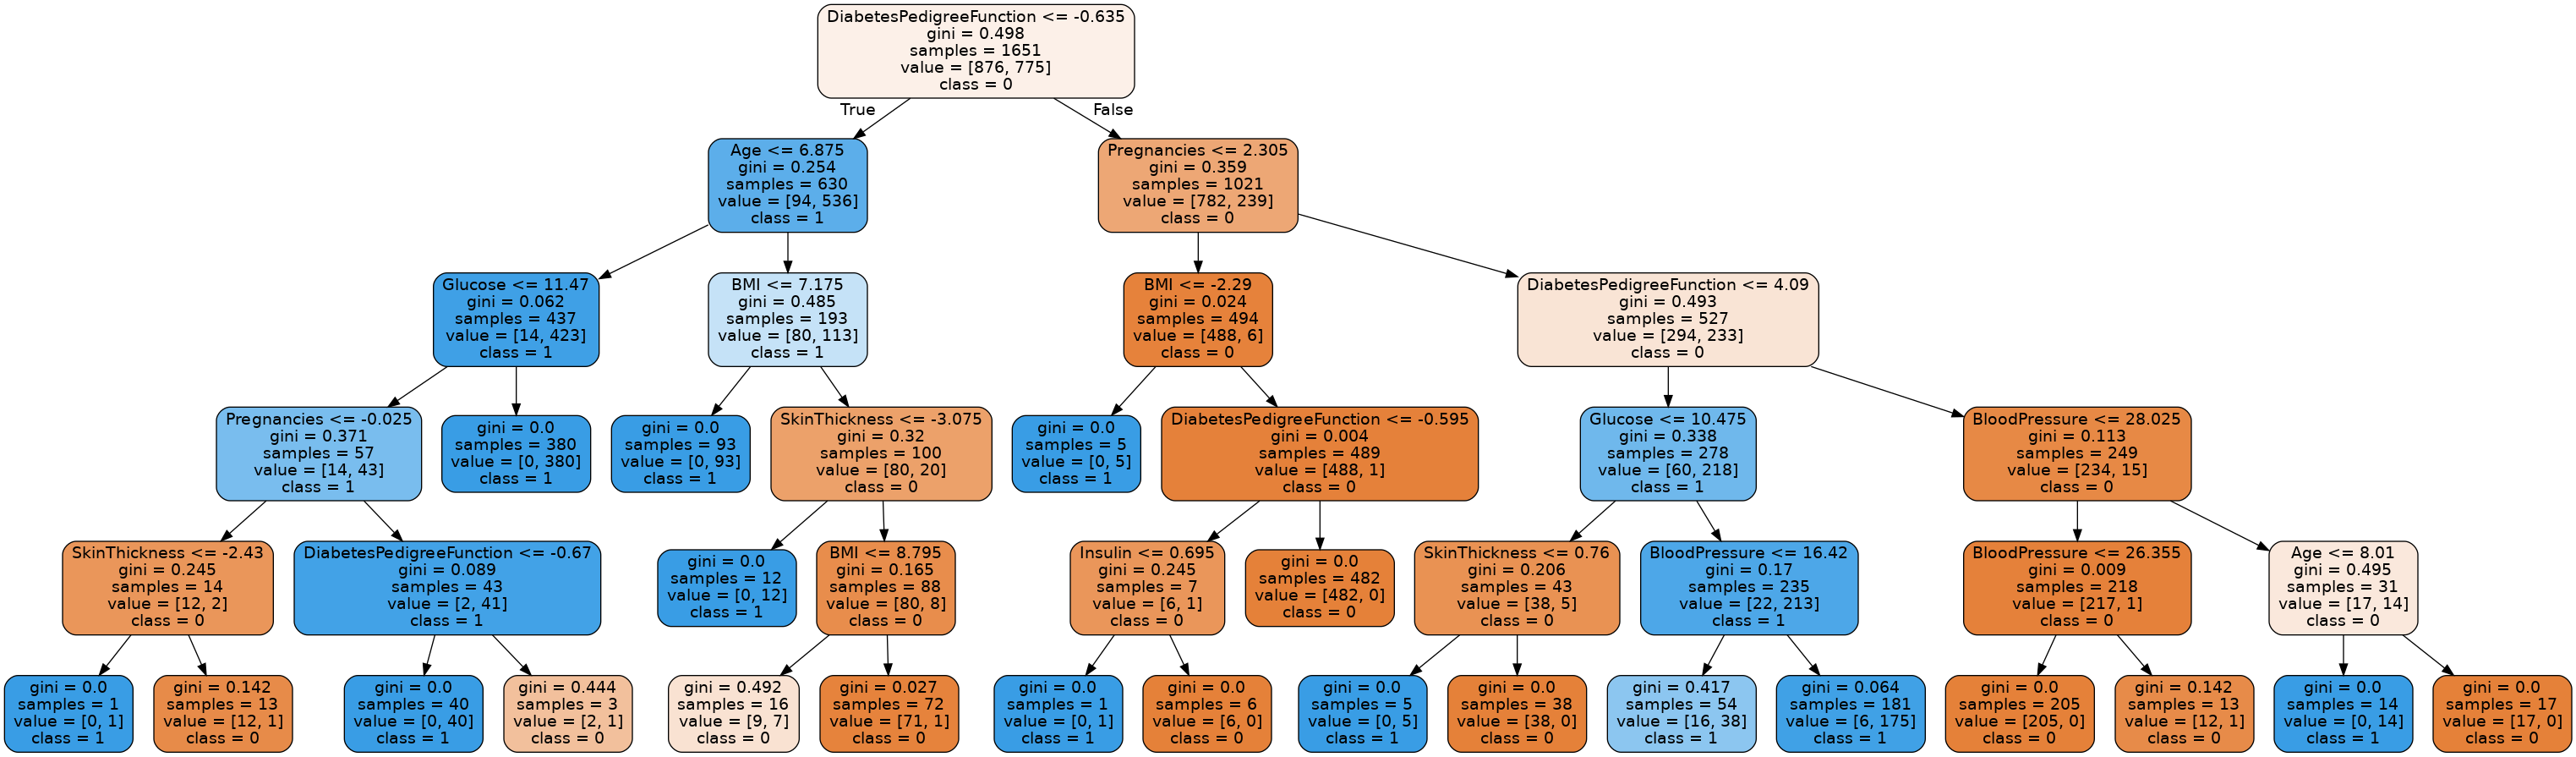

In [14]:
export_graphviz(clf1, out_file="models/tree.dot", feature_names=trainX.columns, class_names=["0","1"], filled=True, rounded=True)
g = pydotplus.graph_from_dot_file(path="models/tree.dot")
Image(g.create_png())

In [15]:
pred = clf1.predict_proba(testX)
pred = np.argmax(pred, axis=1)

In [16]:
mse = ((pred - y_test.values)**2).mean(axis=0)
mse

0.4043478260869565